In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_covtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, auc, confusion_matrix, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, classification_report

from mlxtend.preprocessing import MeanCenterer
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X, Y = fetch_covtype(return_X_y=True, as_frame=True)
X, _, Y, _ =train_test_split(X, Y, train_size=0.01)
Xt = preprocessing.scale(X, with_mean=True, with_std=True)
X = pd.DataFrame(Xt, columns = X.columns)
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,-0.763764,1.739218,-0.420983,-0.281434,0.126047,0.341298,-0.447060,-0.109054,0.429394,-0.622925,...,-0.213373,3.291351,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
1,0.982680,0.847594,0.501406,2.086159,2.079024,2.480204,-1.301597,1.282825,1.725586,-0.128980,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
2,-0.810098,-0.810827,-0.420983,-0.206273,0.142883,-1.352351,0.704706,-0.307894,-0.659407,0.010646,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
3,-1.330467,-0.436345,-1.475143,-1.136399,-0.917786,-0.903238,0.481784,0.636595,0.092384,0.098475,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
4,1.100297,0.811929,1.160256,-0.516315,0.008195,-0.067336,-1.710288,1.332535,1.932977,0.756818,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805,0.947038,-0.436345,-0.157444,0.061491,-1.069310,-0.467618,1.076244,0.089786,-0.814950,0.523358,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845
5806,1.667000,-0.534423,1.555566,0.413811,2.398908,1.000510,1.447782,-1.451222,-2.292609,1.137411,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,6.228525,-0.126845
5807,1.720463,1.569809,-0.289213,2.532432,0.951011,-0.518376,-0.744290,0.089786,0.740480,-0.341421,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,6.000531,-0.160552,-0.126845
5808,-1.202156,-0.516591,-0.816293,0.240000,0.580619,-0.874968,0.779014,0.288626,-0.374245,-1.110865,...,-0.213373,-0.303827,-0.295297,-0.05255,-0.043553,-0.01312,-0.018557,-0.166652,-0.160552,-0.126845


In [4]:
X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, train_size=0.333)
X_test, X_check, Y_test, Y_check = train_test_split(X_tmp, Y_tmp, train_size=0.5)

# Building MLPClassifier with GridSearch

In [5]:
clf = MLPClassifier(warm_start=True)
params = {
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['sgd'],
    'max_iter': [300, 400]
}
cv = GridSearchCV(clf, params).fit(X_check, Y_check)

In [6]:
cv.best_params_

{'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'sgd'}

In [7]:
print(classification_report(Y_test, cv.predict(X_test)))

              precision    recall  f1-score   support

           1       0.68      0.67      0.67       697
           2       0.74      0.79      0.76       948
           3       0.73      0.81      0.77       130
           4       0.75      0.30      0.43        10
           5       0.00      0.00      0.00        26
           6       0.43      0.30      0.36        53
           7       0.79      0.55      0.65        74

    accuracy                           0.71      1938
   macro avg       0.59      0.49      0.52      1938
weighted avg       0.70      0.71      0.70      1938



In [44]:
clf1 = MLPClassifier(warm_start=True, max_iter=400, solver="sgd", learning_rate="adaptive").fit(X_train, Y_train)
clf1.loss_curve_[-20:]

[0.5597693339164397,
 0.5596740224080071,
 0.55946134917314,
 0.5591079044741515,
 0.5588895618404696,
 0.5586918151346537,
 0.5584640225608991,
 0.5581948566976654,
 0.5579772495865194,
 0.5578188236851443,
 0.5575290162379724,
 0.5573635700785617,
 0.557192937895696,
 0.55689093822552,
 0.5567292730029167,
 0.5564744514905043,
 0.5562633411695571,
 0.5560495062047104,
 0.5558134760573182,
 0.5555810948184156]

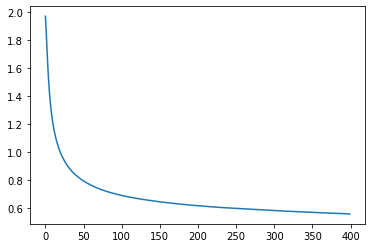

In [45]:
plt.plot(clf1.loss_curve_)

In [47]:
clf1.best_loss_

0.5555810948184156

# Model ansambles

## Stacking classifier

In [8]:
ans_estimators = [
    ("nn", MLPClassifier(learning_rate="constant", max_iter=500, solver="sgd") ),
    ("svc", SVC(kernel='poly', C=10, probability=True, degree=1)),
    ("lsvc", LinearSVC()),
]
ans_params = {
    "final_estimator": [LogisticRegression(), LinearSVC()]
    #stack method not needed
}
st_clf = StackingClassifier(ans_estimators)
ans_cv = GridSearchCV(st_clf, ans_params).fit(X_train, Y_train)

In [9]:
ans_cv.best_params_

{'final_estimator': LogisticRegression()}

In [10]:
print(classification_report(Y_test, ans_cv.predict(X_test)))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70       697
           2       0.76      0.79      0.77       948
           3       0.71      0.83      0.76       130
           4       0.67      0.60      0.63        10
           5       0.00      0.00      0.00        26
           6       0.60      0.28      0.38        53
           7       0.76      0.47      0.58        74

    accuracy                           0.73      1938
   macro avg       0.60      0.53      0.55      1938
weighted avg       0.72      0.73      0.72      1938



In [11]:
bias_variance_decomp(LogisticRegression(), X_train.values, Y_train.values, X_test.values, Y_test.values)

(0.28708720330237353, 0.26625386996904027, 0.06910990712074304)

In [ ]:
bias_variance_decomp(StackingClassifier(ans_estimators), X_train.values, Y_train.values, X_test.values, Y_test.values)

## Gradient Boosting
### dependance of score based on the amount of estimators

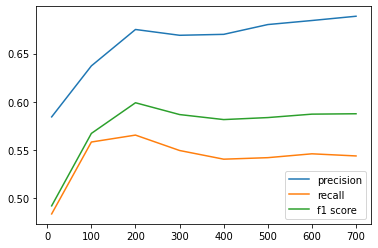

In [15]:
results_p = []
results_r = []
results_f = []
X=[10, 100, 200, 300, 400, 500, 600, 700]
for i in X:
    grad_clf = GradientBoostingClassifier(n_estimators=i).fit(X_train, Y_train)
    results_p.append(precision_score(Y_test, grad_clf.predict(X_test), average="macro"))
    results_r.append(recall_score(Y_test, grad_clf.predict(X_test), average="macro"))
    results_f.append(f1_score(Y_test, grad_clf.predict(X_test), average="macro"))

plt.plot(X, results_p, label="precision")
plt.plot(X, results_r, label="recall")
plt.plot(X, results_f, label="f1 score")
plt.legend()


In [16]:
bias_variance_decomp(GradientBoostingClassifier(n_estimators=200), X_train.values, Y_train.values, X_test.values, Y_test.values)

(0.294703302373581, 0.2708978328173375, 0.11473426212590299)

In [18]:
bias_variance_decomp(DecisionTreeClassifier(), X_train.values, Y_train.values, X_test.values, Y_test.values)

(0.3712487100103199, 0.2564499484004128, 0.26969814241486073)

# Conclusion

Моделі на основі ансамблей навчаються набагато довше за стандартні моделі, але дають кращі результати і менше перенавчаються